In [3]:
# Importing Required Libraries for Data Handling, Visualization, and Image Augmentation
# - numpy: Fundamental package for numerical computations in Python.
# - pandas: Used for data manipulation and analysis, especially with tabular data.
# - os, glob: For file and directory operations, such as listing files.
# - matplotlib.pyplot: For plotting and visualizing data and images.
# - tensorflow: Deep learning framework; here, used for image processing and augmentation.
# - skimage.io: For reading images from files.
# - ImageDataGenerator (from tensorflow.keras): Used for real-time data augmentation of images during model training.

# Note: The import for ImageDataGenerator is updated to use tensorflow.keras instead of the standalone keras package, as TensorFlow now includes Keras as its high-level API.

import numpy as np
import pandas as pd 
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io

# Fix the import statement
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator  

In [6]:
# Loading DataFrame from CSV File
# - pd.read_csv: Reads a comma-separated values (CSV) file into a pandas DataFrame. 
#   The file type used here is CSV (Comma-Separated Values), a common plain text format for tabular data.
#   In this context, the CSV contains mammogram image paths and their corresponding class labels (e.g., 'dense', 'fatty').
# - df.head(): Displays the first five rows of the DataFrame for a quick preview of the data.

df = pd.read_csv('paths_and_labels.csv')
df.head ()

,img_path,class
0,mdb003.pgm.png,dense
1,mdb004.pgm.png,dense
2,mdb033.pgm.png,dense
3,mdb034.pgm.png,dense
4,mdb035.pgm.png,dense


In [5]:
df.img_path[0]

'mdb003.pgm.png'

## First, let's look at what our plan images look like:

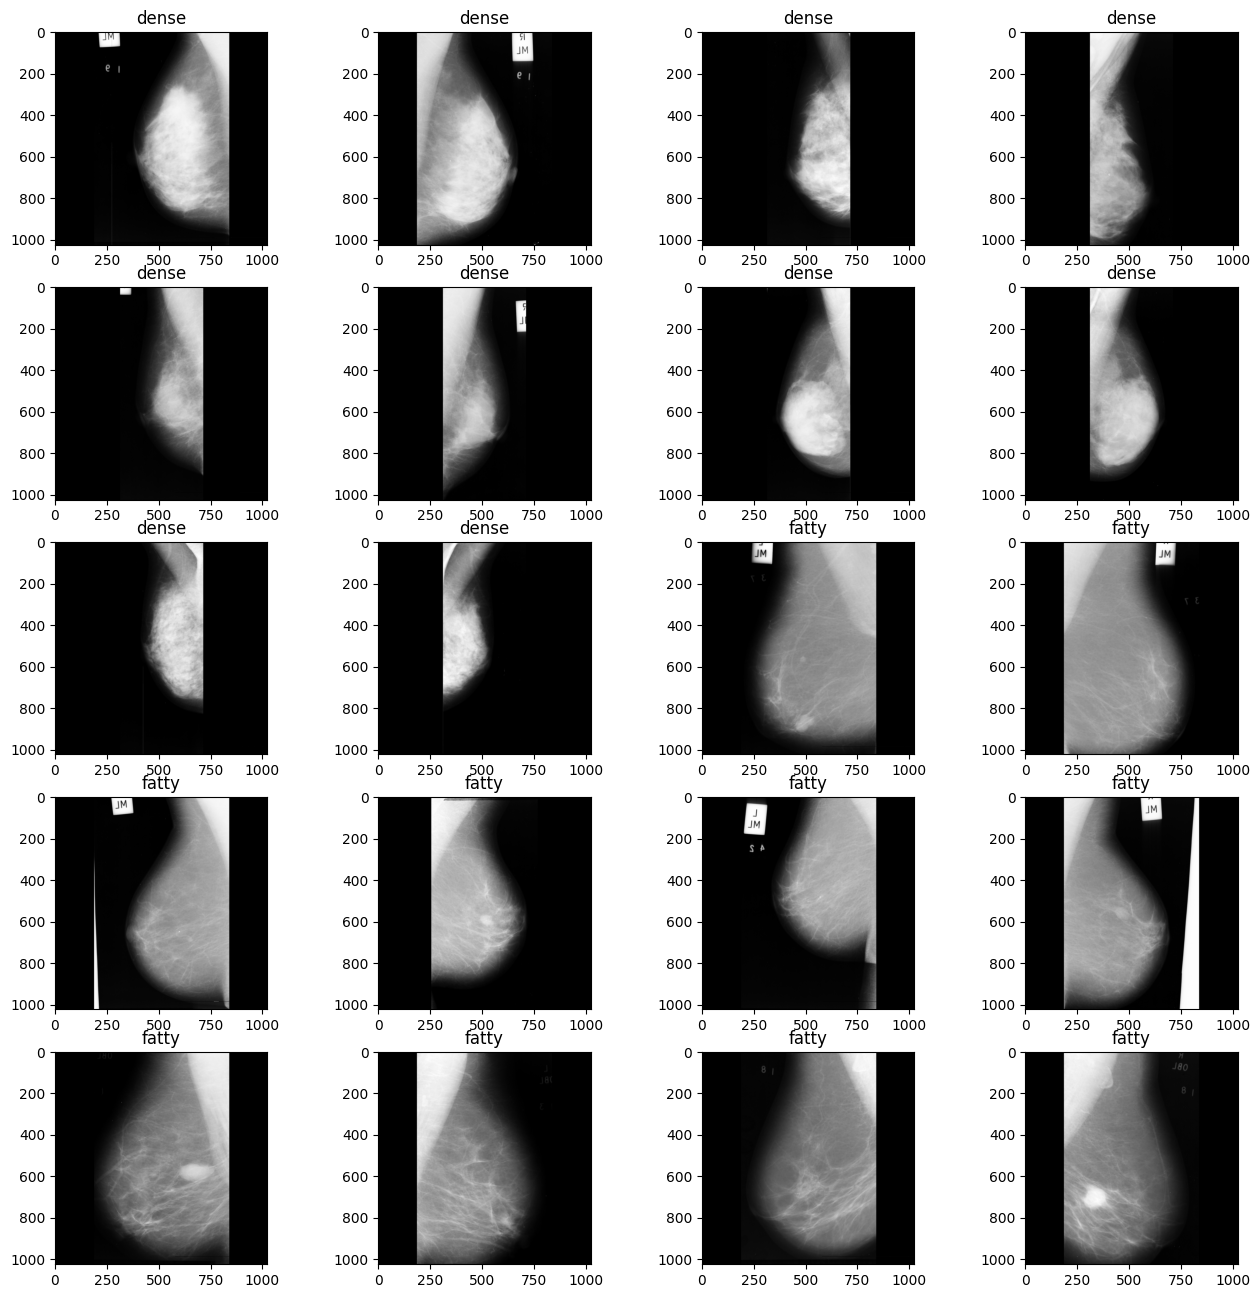

In [9]:
# Displaying Sample Mammogram Images with Class Labels Using Matplotlib and skimage.io
# 
# This block of code visualizes a grid of mammogram images from the dataframe `df` using matplotlib for plotting and skimage.io for image reading.
# - `plt.subplots(5,4, figsize=(16, 16))` creates a 5x4 grid of subplots for displaying 20 images.
# - `df.img_path` provides the file paths for the images.
# - `io.imread(img)` reads each image from disk.
# - `ax.imshow(img, cmap='gray')` displays the image in grayscale on its corresponding subplot.
# - `ax.set_title(df.iloc[ind]['class'])` sets the title of each subplot to the image's class label ('dense' or 'fatty').
# This visualization helps in quickly reviewing the dataset and verifying the class distribution visually.

fig, m_axs = plt.subplots(5,4, figsize = (16, 16))
m_axs = m_axs.flatten()
imgs = df.img_path
ind=0

for img, ax in zip(imgs, m_axs):
    img = io.imread(img)
    ax.imshow(img,cmap='gray')
    ax.set_title(df.iloc[ind]['class'])
    ind=ind+1
m_axs = m_axs.flatten()
imgs = df.img_path
ind=0

for img, ax in zip(imgs, m_axs):
    img = io.imread(img)
    ax.imshow(img,cmap='gray')
    ax.set_title(df.iloc[ind]['class'])
    ind=ind+1

In [ ]:
# Setting Image Size for Deep Learning Models
# 
# This block demonstrates how to specify a target image size for use with pre-trained convolutional neural networks (CNNs).
# - Pre-trained CNNs (such as VGG, ResNet, etc.) require input images of a specific size, commonly 224x224 pixels.
# - The variable `IMG_SIZE` is set as a tuple (224, 224), which will be used later to resize images during data augmentation or preprocessing.
# - This ensures compatibility between your dataset and the input requirements of popular deep learning architectures.

## want to do deep learning using a pre-trained CNN that has a specified size input layer
IMG_SIZE = (224, 224)

#### Below, you will alter the values of the parameters that you pass to ImageDataGenerator. The following cell, you'll display what your augmented images look like. 

#### Play around with different values for the parameters, running the visualization cell below each time to see how these parameters change the appearance of your augmented data. Make some conclusions about what sorts of values might or might not be appropriate for medical imaging based on what you might see in the real world. You can look at the ImageDataGenerator documentation in Keras to add other parameters as well. 

* horizontal_flip and vertical_flip should be set to True/False
* height_shift_range and width_shift_range should be between 0 and 1
* rotation_range can be between 0 and 180
* shear_range can be between 0 and 1
* zoom_range can be between 0 and 1

In [ ]:
# Image Augmentation with Keras ImageDataGenerator
# 
# This block demonstrates how to use Keras' ImageDataGenerator for real-time data augmentation in deep learning workflows.
# - ImageDataGenerator: A utility from keras.preprocessing.image that generates batches of tensor image data with real-time data augmentation. 
#   It helps improve model generalization by creating modified versions of images.
# - Parameters:
#   - rescale: Scales pixel values to the [0, 1] range.
#   - horizontal_flip: Randomly flips images horizontally.
#   - vertical_flip: Randomly flips images vertically (set to False here, as vertical flips are not realistic for medical images).
#   - height_shift_range/width_shift_range: Randomly shifts images vertically/horizontally by a fraction of the total height/width.
#   - rotation_range: Randomly rotates images within the specified degree range.
#   - shear_range: Applies random shearing transformations.
#   - zoom_range: Randomly zooms inside pictures.
# - flow_from_dataframe: Loads images and labels from a pandas DataFrame, applies augmentations, and yields batches for model training.
#   - dataframe: The DataFrame containing image paths and labels.
#   - x_col/y_col: Column names for image paths and class labels.
#   - class_mode: Specifies the type of label arrays that are returned ("binary" for two classes).
#   - target_size: Resizes images to the specified dimensions (IMG_SIZE).
#   - batch_size: Number of images per batch.

idg = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)

gen = idg.flow_from_dataframe(dataframe=df, 
                                         directory=None, 
                                         x_col = 'img_path',
                                         y_col = 'class',
                                         class_mode = 'binary',
                                         target_size = IMG_SIZE, 
                                         batch_size = 9
                                         )

Found 20 validated image filenames belonging to 2 classes.


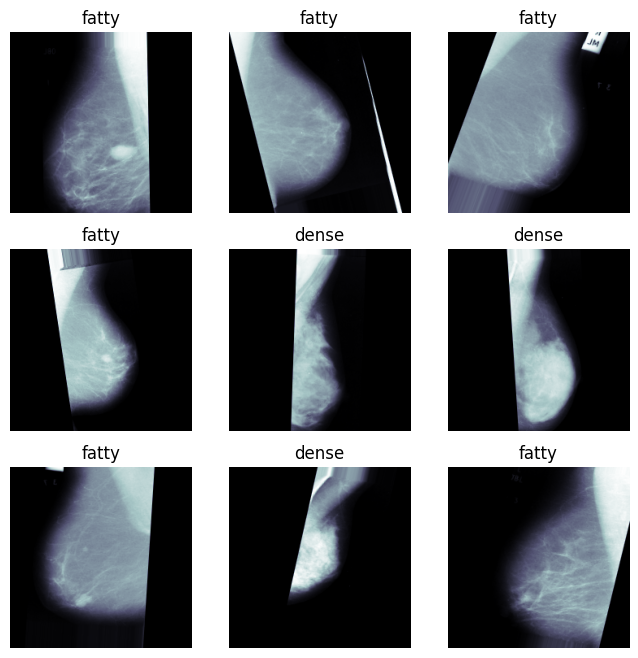

In [ ]:
# Visualizing Augmented Images Using Matplotlib
# 
# This block demonstrates how to visualize batches of augmented images generated by Keras' ImageDataGenerator.
# - `next(gen)`: Retrieves a batch of augmented images (`t_x`) and their labels (`t_y`) from the generator.
# - `plt.subplots(3, 3, figsize=(8, 8))`: Creates a 3x3 grid of subplots for displaying 9 images.
# - The for-loop iterates through each image and label in the batch:
#     - `c_ax.imshow(c_x[:,:,0], cmap='bone')`: Displays the first channel of the image in grayscale using the 'bone' colormap.
#     - Sets the subplot title to 'fatty' or 'dense' based on the label.
#     - Hides axis ticks for a cleaner visualization.
#
## Look at some examples of our augmented training data. 
## This is helpful for understanding the extent to which data is being manipulated prior to training, and can be compared
## With how the raw data look prior to augmentation
t_x, t_y = next(gen)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        c_ax.set_title('fatty')
    else:
        c_ax.set_title('dense')
    c_ax.axis('off')

These look reasonable from a medical imaging point of view. Let's see what happens when we choose different parameters (I'm just copying the above two cells and running them again below with other parameters.) 

In [ ]:

idg = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True, 
                              vertical_flip = True, ## now i'm adding vertical flip
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=45, ## I'm also increasing the rotation_range
                              shear_range = 0.1,
                              zoom_range=0.1)

gen = idg.flow_from_dataframe(dataframe=df, 
                                         directory=None, 
                                         x_col = 'img_path',
                                         y_col = 'class',
                                         class_mode = 'binary',
                                         target_size = IMG_SIZE, 
                                         batch_size = 9
                                         )

Found 20 validated image filenames belonging to 2 classes.


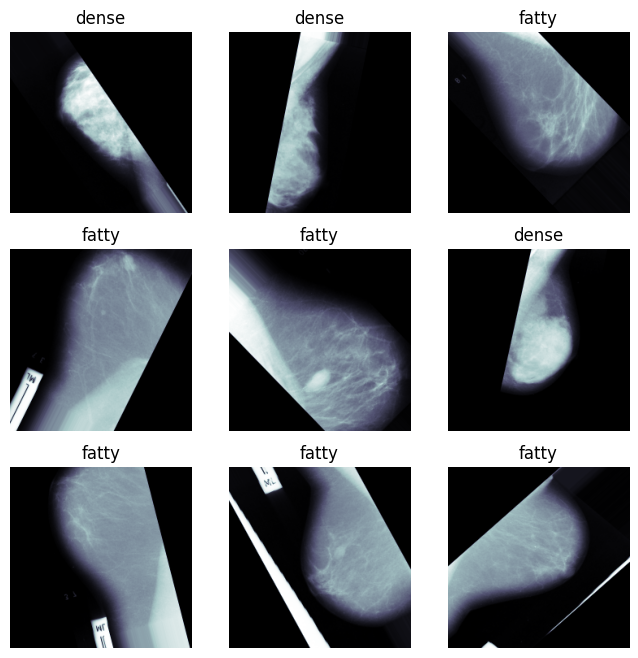

In [14]:
## Look at some examples of our augmented training data. 
## This is helpful for understanding the extent to which data is being manipulated prior to training, and can be compared
## With how the raw data look prior to augmentation
t_x, t_y = next(gen)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        c_ax.set_title('fatty')
    else:
        c_ax.set_title('dense')
    c_ax.axis('off')

These do *not* look reasonable. There are upside-down images because I added vertical flip, which we'd never see in a clinical setting. So, we _don't_ want to use this type of augmentation with medical images.

In [ ]:
idg = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20,
                              shear_range = 0.1,
                              zoom_range=0.5) ## Here I'm adding a lot more zoom 

gen = idg.flow_from_dataframe(dataframe=df, 
                                         directory=None, 
                                         x_col = 'img_path',
                                         y_col = 'class',
                                         class_mode = 'binary',
                                         target_size = IMG_SIZE, 
                                         batch_size = 9
                                         )

Found 20 validated image filenames belonging to 2 classes.


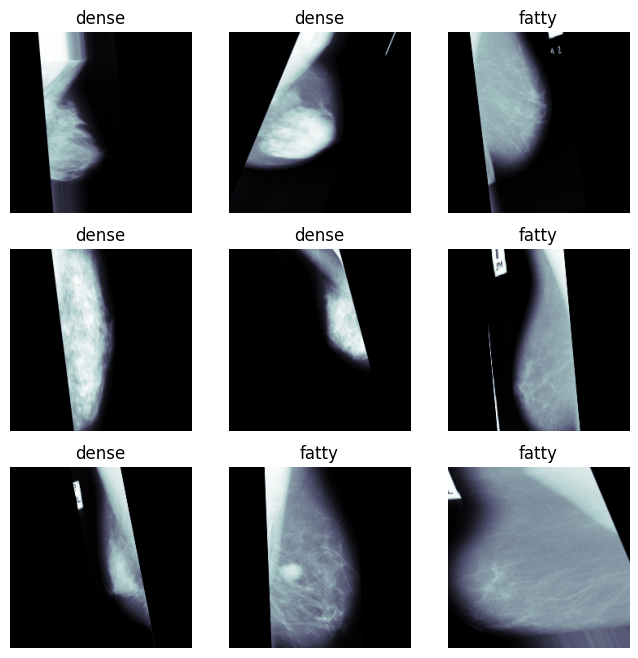

In [16]:
## Look at some examples of our augmented training data. 
## This is helpful for understanding the extent to which data is being manipulated prior to training, and can be compared
## With how the raw data look prior to augmentation
t_x, t_y = next(gen)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        c_ax.set_title('fatty')
    else:
        c_ax.set_title('dense')
    c_ax.axis('off')

These don't look too bad, although it's possible that too much zoom was added. There's no "right" answer for this one, just gaining an understanding of how these parameters change your augmented images. 

# This Jupyter Notebook demonstrates a workflow for medical image classification using deep learning,
# focusing on mammogram images labeled as 'dense' or 'fatty'. It imports essential libraries for data
# handling, visualization, and image processing, loads image paths and class labels from a CSV into a
# pandas DataFrame, and previews the data. Sample images are visualized to understand the dataset.
# The notebook sets up image augmentation using Keras' ImageDataGenerator, experimenting with various
# augmentation parameters (flips, shifts, rotations, zoom) to explore their effects on medical images.
# Augmented images are visualized to assess the appropriateness of different transformations for clinical
# data. The overall goal is to prepare and augment mammogram data effectively for robust deep learning
# model training, while considering the unique requirements of medical imaging.